### We have an e commerce  dataset which contains customer details like email,address,avg session length,time on app and the yearly amount spend. We will build a predictive model which will predict the yearly amount spend by each customer,given the customer information. this information can be used to give customers personalized offers or loyalty memberships,etc.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=pd.read_csv('ecommerce-customers_1740850429129.csv')
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
dataset.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
dataset.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


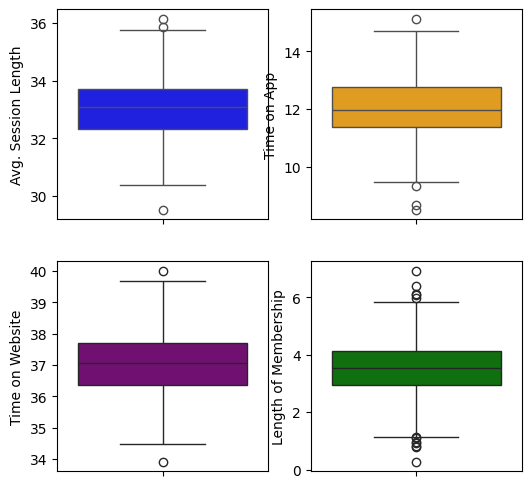

In [10]:
##### Univariate analysis:
import seaborn as sns
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(6,6))

plt1=sns.boxplot(dataset['Avg. Session Length'],color='b',ax=axes[0][0])
plt2=sns.boxplot(dataset['Time on App'],color='orange',ax=axes[0][1])
plt3=sns.boxplot(dataset['Time on Website'],color='purple',ax=axes[1][0])
plt4=sns.boxplot(dataset['Length of Membership'],color='g',ax=axes[1][1])
plt.show()


In [11]:
####1. understand the assumptions of CLRM, multicollinearity,autocorrelation,degrees of freedom.

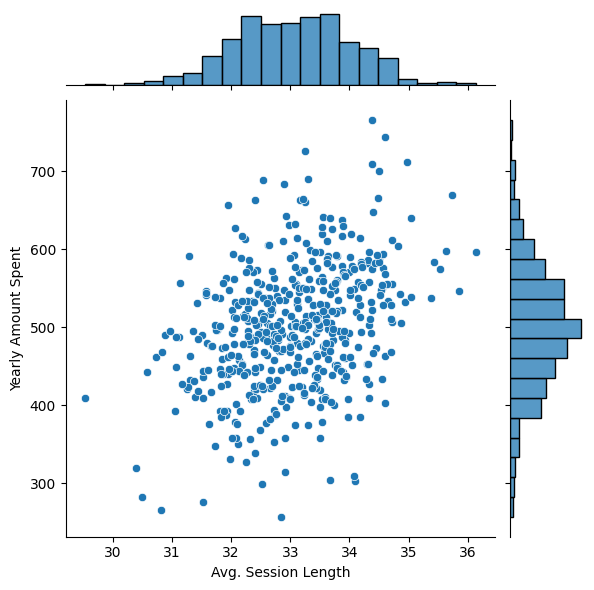

In [12]:
####Bivariate analysis: 
sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=dataset) 
plt.show()

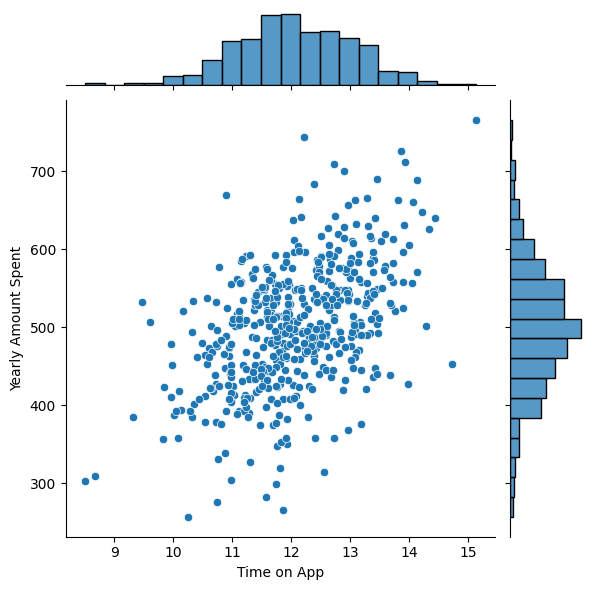

In [13]:
####Bivariate analysis: 
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=dataset) 
plt.show()

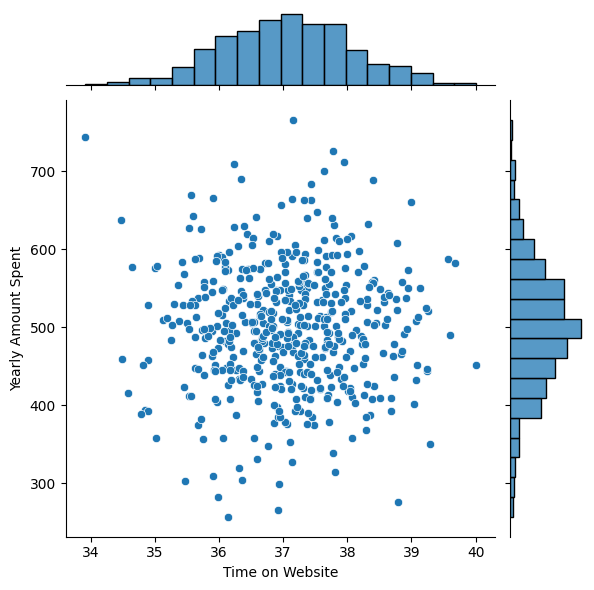

In [14]:
####Bivariate analysis: 
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=dataset) 
plt.show()

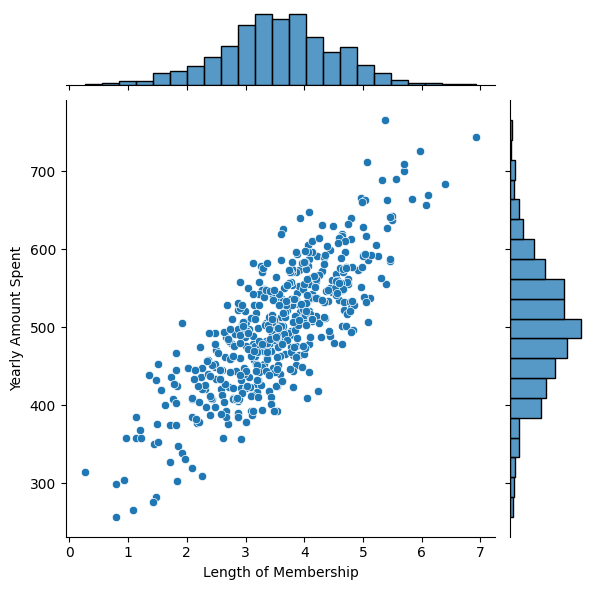

In [15]:
####Bivariate analysis: 
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=dataset) 
plt.show()

In [ ]:
###Length of Membership is very imp , time on app is less important

In [17]:
dataset.corr(numeric_only=True)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [ ]:
###Length of Membership has magnificient impact on Yearly Amount Spent

In [18]:
import warnings
warnings.filterwarnings('ignore')

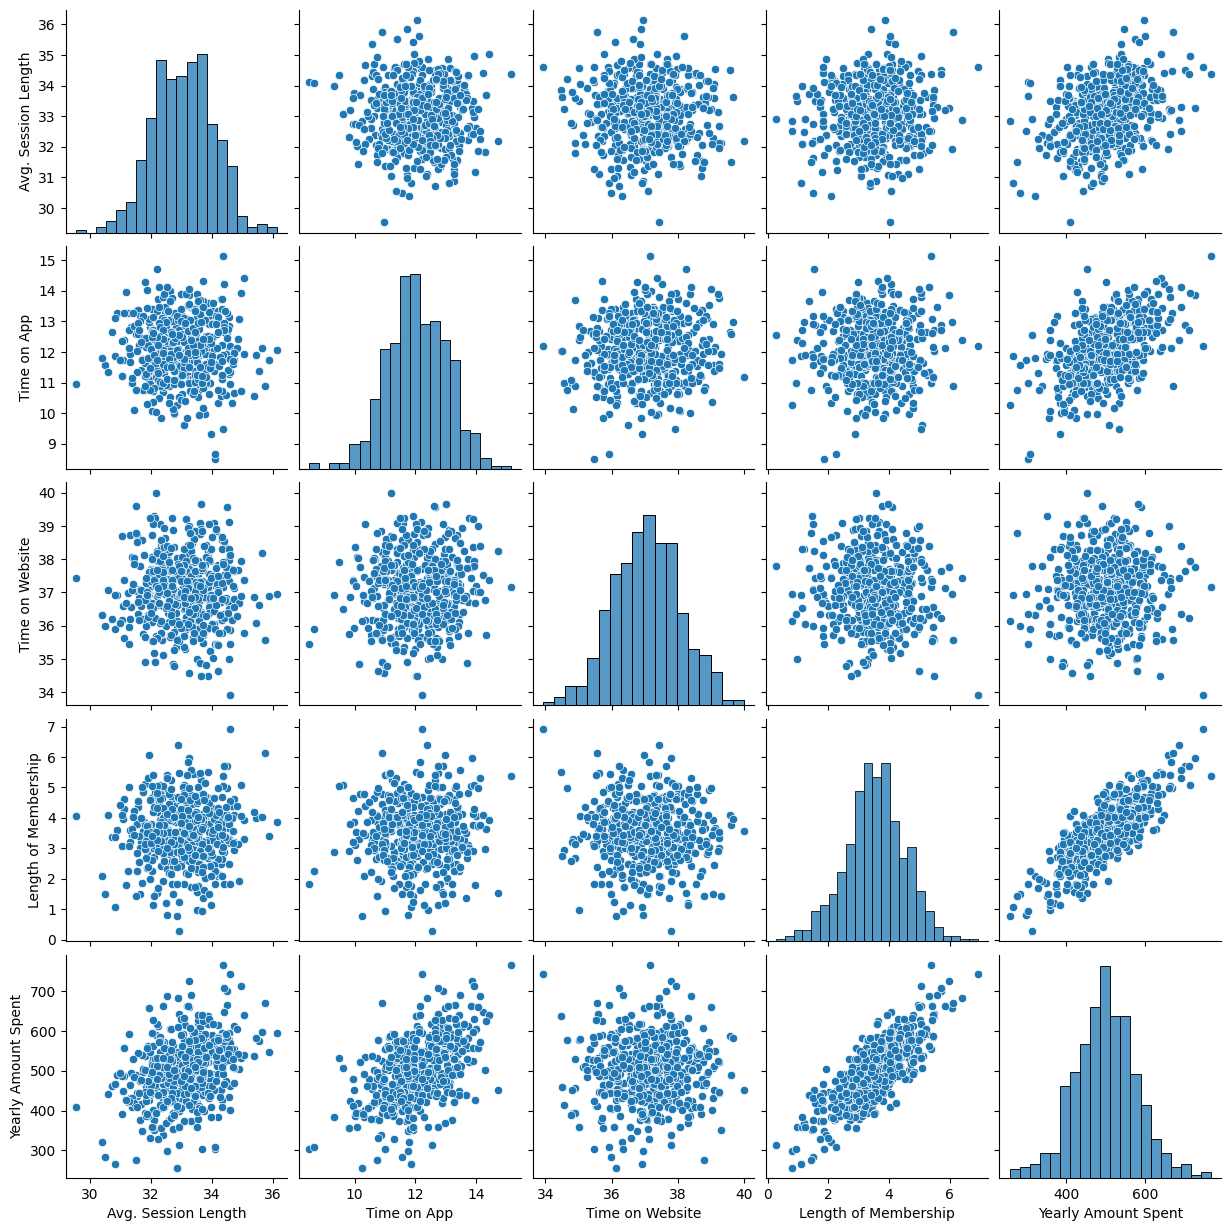

In [21]:
sns.pairplot(dataset)

In [ ]:
###splitting data into feature set and dependent variable set

In [22]:
dataset.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [23]:
X=dataset[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
Y=dataset['Yearly Amount Spent']

In [26]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test=train_test_split(X,Y,test_size=.30, random_state=50)

In [27]:
#### random_state ensures same selection of rows for training and testing. And the selection is fixed by a number. This 
#### number has to be a positive integer value.

In [28]:
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()

In [29]:
##### fitting the training data: 
lm.fit(X_train,y_train) 

LinearRegression()

In [31]:
pred=lm.predict(X_test)
pred

array([523.94203812, 426.34444073, 313.17058035, 504.34448336,
       465.52729697, 486.82265862, 375.0021814 , 552.53816058,
       394.49334798, 512.22127514, 503.97062588, 570.26463998,
       340.03428066, 468.48285904, 518.24946899, 498.09535487,
       516.97019397, 502.23482842, 508.53473955, 279.60433685,
       495.23308369, 556.9079109 , 578.00345811, 657.82772891,
       565.31888798, 478.61683312, 426.96868355, 623.12805006,
       599.70114535, 449.42568969, 387.67815612, 485.16236466,
       430.24338325, 490.41571109, 558.97535776, 507.19161403,
       494.15182394, 515.34812005, 513.35645198, 574.02632983,
       554.01478487, 347.4891829 , 548.76960985, 515.88229022,
       380.21484343, 505.74922508, 471.89401757, 513.5420302 ,
       431.75526417, 505.24714101, 412.23226294, 462.22254397,
       540.81803969, 574.76513792, 254.5202912 , 379.68915161,
       598.67756842, 557.91158511, 588.05904073, 535.2854416 ,
       753.87572529, 703.52721696, 501.17071843, 427.75

In [32]:
from sklearn.metrics import r2_score 
r2=r2_score(pred, y_test) 
r2

0.9812978456747724

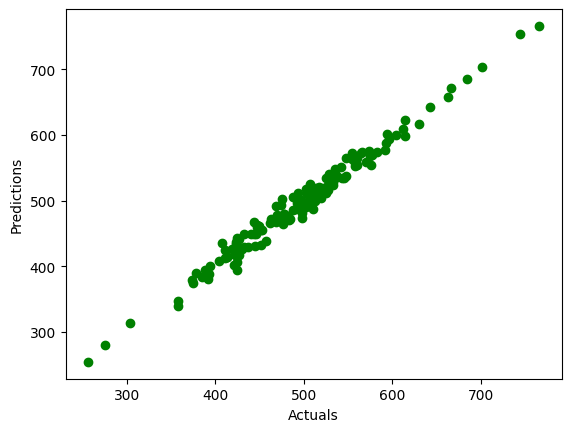

In [33]:
plt.scatter(y_test, pred, color='g') 
plt.xlabel('Actuals') 
plt.ylabel('Predictions') 
plt.show()

In [35]:
#### predicting on new data: 
x_new= [[32.2,12.6,36.5,3.08]] 
pred_new=lm.predict(x_new) 
pred_new

array([470.48052653])

In [36]:
lm.intercept_

np.float64(-1041.7393064380371)

In [37]:
lm.coef_

array([25.67128004, 38.70819291,  0.20742337, 61.78910122])

In [38]:
### the predicted coefficient value and predicted intercept values are parameters

In [41]:
-1041+25.67*32.2+38.70*12.6+0.207*36.5+61.789*3.08 

471.0596200000002